# ABSTRACT

UNSUPERVISED LEARNING ALGORITHMS APPLIED TO ANOMALY DETECTION IN OIL AND GAS WELLS

Monitoring through sensors is a powerful tool in the evaluation of vibrations, loads, deformations, among other problems in which gathering data allows to detect undesirable events that may arise in structures. Growing opportunities have been observed in companies offering sensing, monitoring, and digital transformation services, which offer cost reduction, increased operational safety and improved performance. Technologies for processing the data collected by sensors using machine learning (ML) methodologies have proven to be efficient tools in engineering processes. In the context of petroleum engineering, the prediction and detection of unexpected events stands out, by supporting decision-making processes and adding value to products and services. Thus, this paper aims to study and develop ML-based models for detecting anomalous states in oil wells, by applying classical techniques such as Support Vector Machines, Isolation Forest and Deep Neural Network. It is expected to compare the efficiency of these methodologies applied to time series datasets of pressure, temperature and flow rate, allowing to predict the anomaly occurrence and generate alerts to the production operator. It is observed the practical application and potential of the proposed methodologies for the intended product, being able to improve the fault detection process in oil wells, as well as ensure their integrity.

Machine learning; Autoencoder; LSTM

# Etapas
1. Ler o Artigos do Vargas
2. Selecionar tipo de anomalia a ser analisada
3. Tratar os dados para usar nos moodelos
4. Selecionar Modelos
    - SVM One Class
    - Isolation Forest
    - LSTM
    - Autoencoders
5. Testar Modelos
6. Analisar Métricas

In [1]:
import os
import pandas as pd

path = os.getcwd() + r'\2' + r'\WELL-00002_20131104014101.csv'
df = pd.read_csv(path)

In [2]:
df.head()

,timestamp,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,T-JUS-CKGL,QGL,class
0,2013-11-04 01:41:01.000000,0.0,18852350.0,116.7782,9599435.0,173.0961,2902859.0,NaN,0.0,0.0
1,2013-11-04 01:41:02.000000,0.0,18852350.0,116.7781,9599434.0,173.0961,2902867.0,NaN,0.0,0.0
2,2013-11-04 01:41:03.000000,0.0,18852350.0,116.7780,9599432.0,173.0961,2902875.0,NaN,0.0,0.0
3,2013-11-04 01:41:04.000000,0.0,18852350.0,116.7779,9599431.0,173.0961,2902882.0,NaN,0.0,0.0
4,2013-11-04 01:41:05.000000,0.0,18852350.0,116.7779,9599429.0,173.0961,2902890.0,NaN,0.0,0.0


In [4]:
df.describe()

,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,T-JUS-CKGL,QGL,class
count,9121.0,9.121000e+03,9121.000000,9.121000e+03,9.121000e+03,9.121000e+03,0.0,9121.0,9062.000000
mean,0.0,1.366280e+07,65.583995,6.966953e+06,1.730961e+02,2.854647e+06,NaN,0.0,57.405871
std,0.0,4.765826e+06,45.687582,2.467599e+06,5.684654e-14,8.426010e+05,NaN,0.0,50.553062
min,0.0,8.259124e+06,12.244800,3.212860e+06,1.730961e+02,-5.642208e+04,NaN,0.0,0.000000
25%,0.0,8.506831e+06,19.088020,4.758052e+06,1.730961e+02,2.911347e+06,NaN,0.0,0.000000
50%,0.0,1.310402e+07,45.850320,6.537543e+06,1.730961e+02,2.928785e+06,NaN,0.0,102.000000
75%,0.0,1.885235e+07,116.760700,9.595620e+06,1.730961e+02,2.945322e+06,NaN,0.0,102.000000
max,0.0,1.885235e+07,116.832800,9.599435e+06,1.730961e+02,1.107573e+07,NaN,0.0,102.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9121 entries, 0 to 9120
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   timestamp   9121 non-null   object 
 1   P-PDG       9121 non-null   float64
 2   P-TPT       9121 non-null   float64
 3   T-TPT       9121 non-null   float64
 4   P-MON-CKP   9121 non-null   float64
 5   T-JUS-CKP   9121 non-null   float64
 6   P-JUS-CKGL  9121 non-null   float64
 7   T-JUS-CKGL  0 non-null      float64
 8   QGL         9121 non-null   float64
 9   class       9062 non-null   float64
dtypes: float64(9), object(1)
memory usage: 712.7+ KB


In [6]:
df.isnull().sum()

timestamp        0
P-PDG            0
P-TPT            0
T-TPT            0
P-MON-CKP        0
T-JUS-CKP        0
P-JUS-CKGL       0
T-JUS-CKGL    9121
QGL              0
class           59
dtype: int64

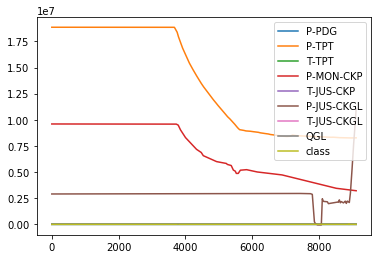

In [3]:
df.plot()